# Step 1: Project Setup
**Project Directory has been created and  Virtual Environment has been setup in VS Code**

# ABOUT THE DATASET

The Breast Cancer dataset contains detailed information about tumors, derived from digitized images of fine needle aspirates (FNAs) of breast masses. It includes measurements that describe the cell nuclei present in the image. Here's a breakdown of the dataset columns:

---

#### **Feature Columns**:
- **mean radius**: Average distance from the center to points on the tumor's perimeter.
- **mean texture**: Standard deviation of gray-scale values in the tumor image.
- **mean perimeter**: Average length of the tumor's boundary.
- **mean area**: Average area of the tumor.
- **mean smoothness**: Measure of variation in the tumor's radius lengths.
- **mean compactness**: Ratio of perimeter² to area minus 1.0.
- **mean concavity**: Severity of concave portions of the tumor's contour.
- **mean concave points**: Number of concave portions on the tumor.
- **mean symmetry**: Symmetry of the tumor.
- **mean fractal dimension**: "Coastline approximation" of the tumor's perimeter.
- **Worst Radius**: The largest distance from the center to the perimeter of the tumor, indicating tumor size.
- **Worst Area**: The largest area enclosed by the tumor's boundary, indicating tumor size.
- **Worst Concavity**: The most concave (inward bulging) portion of the tumor's contour, often found in malignant tumors.
- **Worst Concave Points**: The largest number of inward bulges or indentations on the tumor's boundary, indicative of malignancy.
- **Worst Perimeter**: The largest length around the tumor’s boundary, reflecting tumor size and potential malignancy.



Similar sets of measurements exist for:
- **Standard error** values (e.g., `radius error`, `texture error`).
- **Worst values** (e.g., `worst radius`, `worst texture`).

---

#### **Target Column**:
- **Target**: Indicates tumor diagnosis.
  - **0**: Benign (non-cancerous).
  - **1**: Malignant (cancerous).



# Step 2: Dataset Acquisition and Preparation


## 1. Downloading the Dataset

In [120]:
# Importing the Dataset
from sklearn.datasets import load_breast_cancer

## 2. Data Preparation

In [122]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()

In [124]:
# Convert the dataset into a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

In [126]:
# Add the target variable to the DataFrame
df['target'] = data.target

In [128]:
# Assuming the dataset is already loaded into a DataFrame called df
# Checking the number of unique values for the target column (target)
df['target'].value_counts()


target
1    357
0    212
Name: count, dtype: int64

**This shows that there are 357 malignant(cancerous)  and 212 benign(non-cancerous) records in the data**

In [130]:

# Get the number of rows and columns in the dataset
rows, columns = df.shape

# Print the number of rows and columns
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 569
Number of columns: 31


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [134]:

# Save the dataset to a CSV file for future use
df.to_csv('breast_cancer_data.csv', index=False)
print("Data saved to breast_cancer_data.csv")


Data saved to breast_cancer_data.csv


In [136]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Visualizing the Distribution of Classes (Benign vs Malignant)

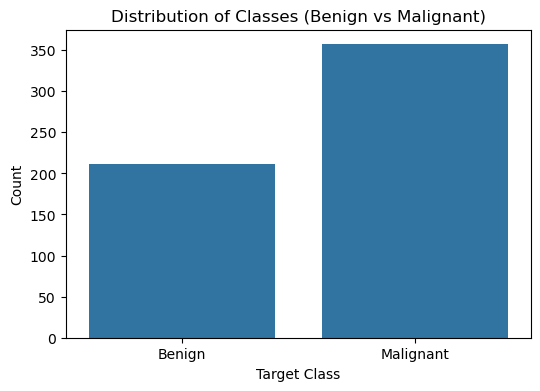

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of target classes (Benign vs Malignant)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Classes (Benign vs Malignant)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


**It can be observed from the bar graph that it is an imbalanced dataset**

In [140]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")


Original class distribution: Counter({1: 357, 0: 212})
Resampled class distribution: Counter({0: 357, 1: 357})


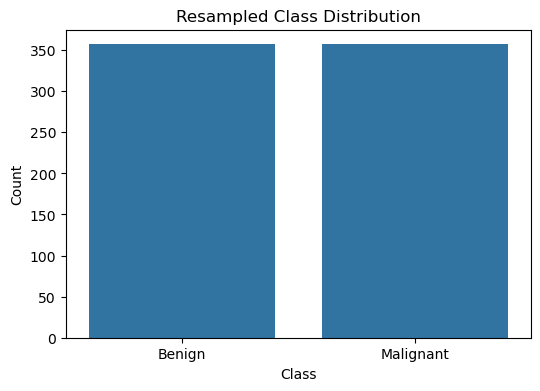

In [142]:
# Plot resampled class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

**Both the classes have been balanced**

## Visualizing the Distribution of Features ( Mean Radius)

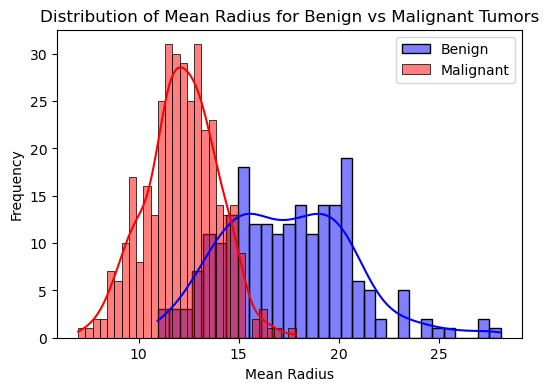

In [183]:
# Plotting the distribution of 'mean radius' for benign and malignant tumors
plt.figure(figsize=(6, 4))
sns.histplot(df[df['target'] == 0]['mean radius'], kde=True, color='blue', label='Benign', bins=30)
sns.histplot(df[df['target'] == 1]['mean radius'], kde=True, color='red', label='Malignant', bins=30)
plt.title('Distribution of Mean Radius for Benign vs Malignant Tumors')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Observations in Context:

#### Malignant Tumors (Red Distribution):
- Tend to have smaller mean radii on average, indicating that malignant tumors are generally smaller in size.
- The distribution peaks in the range of approximately **10 to 15**, suggesting most malignant tumors fall within this size range.

#### Benign Tumors (Blue Distribution):
- Exhibit larger mean radii on average, reflecting that benign tumors are typically larger.
- The distribution peaks in the range of approximately **15 to 20**, with some tumors having even larger mean radii.

#### Overlap Between Distributions:
- The overlap in the **13 to 17 range** implies that some tumors in this size range could be either benign or malignant, making size alone insufficient for perfect classification.
- Highlights the importance of using additional features (e.g., texture, compactness, or smoothness) to complement `mean radius` for more accurate diagnosis.

### Implications:
- **Malignant Tumors:** Smaller on average, with irregular growth and rapid proliferation, making `mean radius` useful but not definitive on its own.
- **Benign Tumors:** Larger on average, with regular and stable growth patterns characteristic of benign tumors.


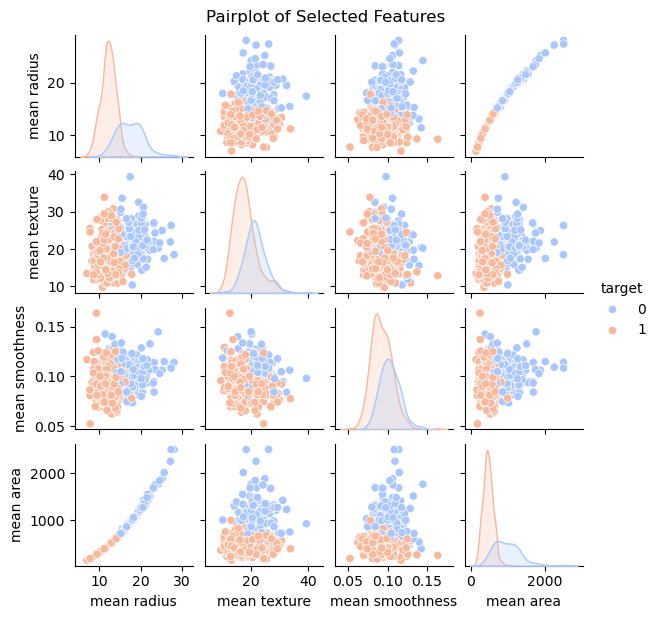

In [191]:
# Select a subset of features for pairplot visualization
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean area', 'target']

# Plotting pairplot
sns.pairplot(df[selected_features], hue='target', palette='coolwarm', diag_kind='kde', height=1.5)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


### Key Insights from Pairplot:

1. **Mean Radius**: Shows a clear distinction between benign (lower values) and malignant (higher values) cases. It’s a strong predictor.

2. **Mean Texture**: There is some overlap between the classes, but malignant cases tend to have higher values.

3. **Mean Smoothness**: Slight distinction between classes, with malignant cases spreading across higher values.

4. **Mean Area**: Malignant cases have larger values, providing good separation from benign cases.

5. **Correlations**: Strong positive correlation between `mean radius` and `mean area`. Weaker correlation between `mean texture` and `mean smoothness`.

---

### General Observation:
While most features show some separation between benign and malignant cases, there is overlap in `mean texture` and `mean smoothness`. The features `mean radius` and `mean area` appear most effective for classification.


# Step 3: Feature Selection
## 1. Feature Selection Technique
- **Implement feature selection using methods like SelectKBest from
sklearn.feature_selectio**n

In [146]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Load the prepared dataset from the CSV file
df = pd.read_csv('breast_cancer_data.csv')

In [148]:
# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

In [150]:
# Apply the SelectKBest feature selection method
# Using ANOVA F-statistic as the scoring function
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_resampled, y_resampled)


**SelectKBest** is a feature selection method from scikit-learn that selects the top k features from the dataset based on a specified statistical test. The primary goal is to retain only the most relevant features that are strongly correlated with the target variable, thereby reducing the feature space for the model.

#### Key Advantages:
- **Improves Model Performance:** By removing irrelevant or redundant features, the model learns better patterns.
- **Speeds Up Training:** Reducing the number of features decreases the computational complexity.
- **Reduces Overfitting:** Fewer features help prevent the model from memorizing the training data.


**The ANOVA F-statistic** is a statistical measure that evaluates the relationship between each feature and the target variable (for classification problems). It calculates how much of the variability in the target variable can be explained by each individual feature.

​
 **Why Use SelectKBest with ANOVA F-Statistic?**
 1. **Feature Relevance**
Identifies features most strongly correlated with the target (e.g., whether a tumor is malignant or benign).

3. **Dimensionality Reduction**
Reduces model complexity and the risk of overfitting by retaining only the top k informative features.

4. **Suitability for Classification**
Works effectively with numerical features and binary targets, as in the Breast Cancer dataset.

- **Example**
If "mean radius" shows significant variation between benign and malignant tumors, it gets a high F-statistic score, making it more likely to be selected. Less informative features, with minimal variance, are discarded.

### By using SelectKBest with ANOVA F-statistic:

- We ensure the dataset is optimized for the classification model.
- We focus on the features that have the highest predictive power, avoiding noise and redundancy.

In [152]:
# Get the names of the selected features
selected_features = X_resampled.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


**So, the best feature that were selected for our analysis were 'mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points'**

# Step 4: Grid Search CV for Model Tuning
## 1. Grid Search Cross-Validation


In [154]:
# Importing necessary libraries for Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

In [156]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [158]:
# Define an MLPClassifier model
model = MLPClassifier(max_iter=500)

The MLP (Multilayer Perceptron) Classifier is a type of artificial neural network used for classification tasks. It consists of three main layers:

1. **Input Layer**: Receives the input features.
2. **Hidden Layers**: Process inputs through neurons with weighted sums and activation functions (like ReLU, sigmoid, or tanh) to introduce non-linearity.
3. **Output Layer**: Provides the final classification result.

### Key features:
- Uses **backpropagation** for weight adjustment.
- Models complex relationships through **non-linear activation functions**.


In [160]:
# Define the hyperparameter grid for Grid Search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
}

In [162]:
# Perform Grid Search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\taman\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [164]:
# Output the best parameters and corresponding score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Best Score: 0.9437979797979799


### Best Parameters:
- **activation = 'relu'**: ReLU activation function used in hidden layers.
- **alpha = 0.001**: L2 regularization term to prevent overfitting.
- **hidden_layer_sizes = (50,)**: One hidden layer with 50 neurons.
- **solver = 'adam'**: Adam optimizer for efficient training.

### Best Score: 0.9437
- The model achieved an accuracy of **94.3%**, indicating strong performance on the task.
- The configuration suggests a well-tuned model with balanced complexity and regularization to avoid overfitting.


In [167]:
# Evaluate the best model on the test dataset
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       102
           1       0.94      0.96      0.95       113

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



# Step 5: Implementing an Artificial Neural Network (ANN) Model
### 1. ANN Model Creation:
- Outline the steps to create an ANN model.
- Train and evaluate the model using the breast cancer dataset.

In [169]:
# Importing all libraries to implement ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

In [171]:
# Initialize the ANN model with specified parameters
model = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500)

In [173]:
# Train the ANN model on the training data
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)

In [175]:
# Predict the target variable for the test data
y_pred = model.predict(X_test)

In [177]:
# Print the classification report for the test predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       102
           1       0.89      0.99      0.94       113

    accuracy                           0.93       215
   macro avg       0.94      0.93      0.93       215
weighted avg       0.94      0.93      0.93       215



# Model Performance Insights: Class 0 (Benign) vs. Class 1 (Malignant)

---

## Model’s Ability to Predict Class 0 (Benign):

### Precision for Class 0:
- **After Grid Search CV**: 0.95  
- **Without Grid Search**: 0.99  
**Insight**: The model achieves a high precision of **0.95** after Grid Search, meaning that 95% of predictions for benign cases are correct. However, the precision is even higher (**0.99**) without Grid Search, indicating that the default model is more precise but may be overfitting, favoring benign predictions. This high precision in the default model comes at the cost of lower recall.

### Recall for Class 0:
- **After Grid Search CV**: 0.93  
- **Without Grid Search**: 0.86  
**Insight**: The recall for class 0 (benign) improves with Grid Search (**0.93 vs. 0.86**). This means that, after tuning, the model correctly identifies 93% of all benign tumors. Without Grid Search, recall drops to 86%, indicating that the default model misses 14% of benign cases. The improvement in recall after Grid Search reflects better handling of benign cases, with fewer false negatives.

### F1-Score for Class 0:
- **After Grid Search CV**: 0.94  
- **Without Grid Search**: 0.92  
**Insight**: The **F1-score for class 0** improves with Grid Search, from **0.92 to 0.94**. This shows a better balance between precision and recall in the tuned model, making it more effective at handling benign predictions while reducing false positives and false negatives.

---

## Model’s Ability to Predict Class 1 (Malignant):

### Precision for Class 1:
- **After Grid Search CV**: 0.94  
- **Without Grid Search**: 0.89  
**Insight**: Precision for class 1 (malignant) improves with Grid Search (**0.94 vs. 0.89**), meaning the tuned model is better at minimizing false positives. In the default model, 11% of malignant predictions are false positives. The higher precision after Grid Search indicates that the model has become more reliable in identifying malignant tumors without misclassifying benign ones as malignant.

### Recall for Class 1:
- **After Grid Search CV**: 0.96  
- **Without Grid Search**: 0.99  
**Insight**: The **recall for class 1** slightly decreases with Grid Search (**0.96 vs. 0.99**). While both models have high recall, the default model misses only 1% of malignant cases, whereas the tuned model misses 4%. This trade-off in recall might be acceptable in certain applications, but it indicates that the grid search model is slightly more conservative in predicting malignant cases.

### F1-Score for Class 1:
- **After Grid Search CV**: 0.95  
- **Without Grid Search**: 0.94  
**Insight**: The **F1-score for class 1** improves marginally after Grid Search, from **0.94 to 0.95**. The slight increase suggests that the tuned model maintains a strong balance between precision and recall for malignant predictions, ensuring effective identification of malignant tumors with minimal false negatives.

---

## General Insights:

### Class 1 (Malignant):
- The model performs **exceptionally well** in predicting malignant cases, especially with **high recall (99%)** in the default model. The recall drops slightly to **96%** after hyperparameter tuning, but this is still a strong result. The precision also improves after Grid Search, reducing false positives in malignant predictions.
- **Precision (94%)** after Grid Search indicates that the model is highly accurate when predicting malignant tumors, but there’s a slight trade-off in recall compared to the default model.

### Class 0 (Benign):
- The model performs well for benign cases, particularly with **high precision (99%)** in the default model, ensuring that no benign cases are incorrectly classified as malignant.
- However, **recall for class 0** is lower without Grid Search (86%), indicating that some benign cases are missed. With Grid Search, recall improves to **93%**, suggesting that the tuned model does a better job of identifying benign tumors.
- The **F1-score** for benign cases improves after Grid Search, reflecting a better balancees a more reliable and balanced model for both classes.


## Conclusion:
- **Using Grid Search CV** significantly improves the model's performance, particularly for class 1 (malignant), by enhancing precision and recall. Although there is a small trade-off in recall for malignant tumors, the overall performance is balanced.
- **Without Grid Search**, the model prioritizes precision for benign cases but sacrifices recall, leading to some missed benign instances. The model's performance for malignant cases is also slightly less optimized, with lower precision and recall.
- For medical applications like breast cancer diagnosis, a balance between precision and recall is critical, and **hyperparameter tuning (Grid Search CV)** provides a more reliable and balanced model for both classes.